# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing Scikit Learn
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_linnerud
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
import optuna
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data = pd.read_csv("original_data_.csv")
data.head()

,title,platform,studio,genre,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,...,first_seen_est_date,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget,release_year,release_month,release_day,release_weekday
0,Two Witches,iTunes,Other,Horror,0,1,0,1,0,0,...,2022-10-17,365,0,0,0,1,2021,10,17,Sunday
1,Heaven,iTunes,Other,Drama,0,1,0,1,0,0,...,2021-10-05,365,0,0,0,1,2020,10,5,Monday
2,Enhanced 2 the Max,iTunes,Other,Documentary,1,0,0,1,0,0,...,2020-01-31,365,0,0,0,1,2019,1,31,Thursday
3,Clara Sola,iTunes,Other,Drama,0,0,1,1,0,0,...,2022-10-04,365,0,0,0,1,2021,10,4,Monday
4,Kids Chasing Paradise,iTunes,Other,Documentary,0,1,0,1,0,0,...,2021-05-11,365,1,0,0,0,2020,5,11,Monday


In [3]:
data.columns

Index(['title', 'platform', 'studio', 'genre', 'PreCovid', 'Covid',
       'PostCovid', 'pitunes', 'pamazon', 'pvudu', 'pappletv', 'pgoogle',
       'swb', 'ssony', 'suni', 'spara', 'sdis', 'sfox', 'shbo', 'sother',
       'release_date', 'first_seen_est_date', 'est_delta', 'SmallBudget',
       'MediumBudget', 'LargeBudget', 'UnknownBudget', 'release_year',
       'release_month', 'release_day', 'release_weekday'],
      dtype='object')

# Data cleaning

In [4]:
data_ = data.drop(['title','platform','studio',
                   'genre','first_seen_est_date','release_date'],axis = 1)
data_.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,sother,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget,release_year,release_month,release_day,release_weekday
0,0,1,0,1,0,0,0,0,0,0,...,1,365,0,0,0,1,2021,10,17,Sunday
1,0,1,0,1,0,0,0,0,0,0,...,1,365,0,0,0,1,2020,10,5,Monday
2,1,0,0,1,0,0,0,0,0,0,...,1,365,0,0,0,1,2019,1,31,Thursday
3,0,0,1,1,0,0,0,0,0,0,...,1,365,0,0,0,1,2021,10,4,Monday
4,0,1,0,1,0,0,0,0,0,0,...,1,365,1,0,0,0,2020,5,11,Monday


In [5]:
print("Original weekday data:", data_['release_weekday'].value_counts())

Original weekday data: release_weekday
Tuesday      35578
Friday       30209
Monday        5051
Thursday      4439
Wednesday     3619
Saturday      2740
Sunday        2515
Name: count, dtype: int64


# Labelencoding

In [6]:
label_encoder = LabelEncoder()

encoded_weekday_data = label_encoder.fit_transform(data_['release_weekday'])

data_['release_weekday_encoded'] = encoded_weekday_data

In [7]:
weekday_mapping = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}

data_['release_weekday_encoded'] = data_['release_weekday'].map(weekday_mapping)

In [8]:
data_.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,est_delta,SmallBudget,MediumBudget,LargeBudget,UnknownBudget,release_year,release_month,release_day,release_weekday,release_weekday_encoded
0,0,1,0,1,0,0,0,0,0,0,...,365,0,0,0,1,2021,10,17,Sunday,0
1,0,1,0,1,0,0,0,0,0,0,...,365,0,0,0,1,2020,10,5,Monday,1
2,1,0,0,1,0,0,0,0,0,0,...,365,0,0,0,1,2019,1,31,Thursday,4
3,0,0,1,1,0,0,0,0,0,0,...,365,0,0,0,1,2021,10,4,Monday,1
4,0,1,0,1,0,0,0,0,0,0,...,365,1,0,0,0,2020,5,11,Monday,1


# One-hot Encoding

In [9]:
onehot_encoder = OneHotEncoder()

In [10]:
reshaped_data = data_['release_weekday'].values.reshape(-1, 1)

In [11]:
onehot_encoded_data = onehot_encoder.fit_transform(reshaped_data)

In [12]:
onehot_encoded_array = onehot_encoded_data.toarray()

In [13]:
for i, category in enumerate(onehot_encoder.categories_[0]):
    data_[f'{category}_encoded'] = onehot_encoded_array[:, i]

In [14]:
data_

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,release_day,release_weekday,release_weekday_encoded,Friday_encoded,Monday_encoded,Saturday_encoded,Sunday_encoded,Thursday_encoded,Tuesday_encoded,Wednesday_encoded
0,0,1,0,1,0,0,0,0,0,0,...,17,Sunday,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,1,0,0,0,0,0,0,...,5,Monday,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,1,0,0,0,0,0,0,...,31,Thursday,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,1,0,0,0,0,0,0,...,4,Monday,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,0,0,0,0,0,0,...,11,Monday,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84146,0,1,0,0,1,0,0,0,0,0,...,22,Friday,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
84147,0,1,0,0,1,0,0,0,0,0,...,18,Friday,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
84148,0,1,0,0,1,0,0,0,0,0,...,29,Tuesday,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
84149,0,1,0,0,1,0,0,0,0,0,...,19,Friday,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84151 entries, 0 to 84150
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PreCovid                 84151 non-null  int64  
 1   Covid                    84151 non-null  int64  
 2   PostCovid                84151 non-null  int64  
 3   pitunes                  84151 non-null  int64  
 4   pamazon                  84151 non-null  int64  
 5   pvudu                    84151 non-null  int64  
 6   pappletv                 84151 non-null  int64  
 7   pgoogle                  84151 non-null  int64  
 8   swb                      84151 non-null  int64  
 9   ssony                    84151 non-null  int64  
 10  suni                     84151 non-null  int64  
 11  spara                    84151 non-null  int64  
 12  sdis                     84151 non-null  int64  
 13  sfox                     84151 non-null  int64  
 14  shbo                  

# Standard Scaler

In [16]:
scaler = StandardScaler()

In [17]:
# Reshape the data to a 2D array (required by StandardScaler)
release_year_data = data_['release_year'].values.reshape(-1, 1)
release_month_data = data_['release_month'].values.reshape(-1, 1)
release_day_data = data_['release_day'].values.reshape(-1, 1)

In [18]:
scaled_release_year_data = scaler.fit_transform(release_year_data)
scaled_release_month_data = scaler.fit_transform(release_month_data)
scaled_release_day_data = scaler.fit_transform(release_day_data)

In [19]:
data_['release_year_scaled'] = scaled_release_year_data
data_['release_month_scaled'] = scaled_release_month_data
data_['release_day_scaled'] = scaled_release_day_data

In [20]:
data_.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,Friday_encoded,Monday_encoded,Saturday_encoded,Sunday_encoded,Thursday_encoded,Tuesday_encoded,Wednesday_encoded,release_year_scaled,release_month_scaled,release_day_scaled
0,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.701150,0.995099,0.330039
1,0,1,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.339185,0.995099,-1.026810
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.022780,-1.624178,1.913029
3,0,0,1,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.701150,0.995099,-1.139880
4,0,1,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.339185,-0.460055,-0.348385


In [21]:
data_ = data_.drop(['release_weekday','release_weekday_encoded','release_year','release_month','release_day'],axis = 1)
data_.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,Friday_encoded,Monday_encoded,Saturday_encoded,Sunday_encoded,Thursday_encoded,Tuesday_encoded,Wednesday_encoded,release_year_scaled,release_month_scaled,release_day_scaled
0,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.701150,0.995099,0.330039
1,0,1,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.339185,0.995099,-1.026810
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.022780,-1.624178,1.913029
3,0,0,1,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.701150,0.995099,-1.139880
4,0,1,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.339185,-0.460055,-0.348385


# From the graph we can say it is right skewed

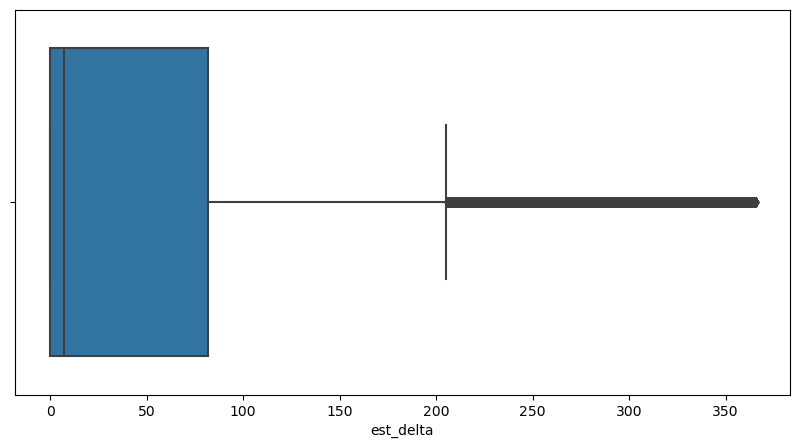

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = data_['est_delta'], orient = 'h')
plt.show()

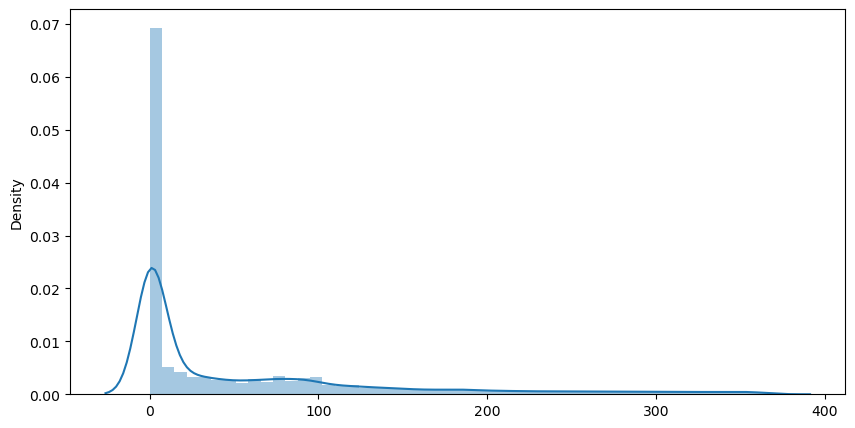

In [23]:
plt.figure(figsize = (10, 5))
sns.distplot(x = data_['est_delta'], hist = True)
plt.show()

In [24]:
data_['est_delta'].skew()

1.828693804409107

# Inter Quartile Range

In [25]:
def find_bounds(data_):
    Q1 = data_['est_delta'].quantile(0.25)
    Q3 = data_['est_delta'].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    new_data = data_[(data_['est_delta'] >= lower_bound) & (data_['est_delta'] <= upper_bound)]
    return new_data

In [26]:
data_1 = find_bounds(data_)

In [27]:
data_1.head()

,PreCovid,Covid,PostCovid,pitunes,pamazon,pvudu,pappletv,pgoogle,swb,ssony,...,Friday_encoded,Monday_encoded,Saturday_encoded,Sunday_encoded,Thursday_encoded,Tuesday_encoded,Wednesday_encoded,release_year_scaled,release_month_scaled,release_day_scaled
6795,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.022780,0.704068,-1.479092
6796,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.556535,0.995099,-0.800668
6797,1,0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.470640,-0.751086,-0.461456
6798,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.832605,0.995099,-0.574527
6799,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.556535,1.577161,-1.479092


In [28]:
data_1['est_delta'].value_counts()

est_delta
0      28035
1       5999
6       1993
3       1836
2       1710
       ...  
169       46
177       45
201       45
205       44
191       34
Name: count, Length: 206, dtype: int64

In [29]:
data_1.shape

(77356, 31)

# Data Preprocessing

In [30]:
data_1 = data_1[(data_1['est_delta']>=0) & (data_1['est_delta']<365)]

In [31]:
data_1.shape

(77356, 31)

In [32]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77356 entries, 6795 to 84150
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PreCovid              77356 non-null  int64  
 1   Covid                 77356 non-null  int64  
 2   PostCovid             77356 non-null  int64  
 3   pitunes               77356 non-null  int64  
 4   pamazon               77356 non-null  int64  
 5   pvudu                 77356 non-null  int64  
 6   pappletv              77356 non-null  int64  
 7   pgoogle               77356 non-null  int64  
 8   swb                   77356 non-null  int64  
 9   ssony                 77356 non-null  int64  
 10  suni                  77356 non-null  int64  
 11  spara                 77356 non-null  int64  
 12  sdis                  77356 non-null  int64  
 13  sfox                  77356 non-null  int64  
 14  shbo                  77356 non-null  int64  
 15  sother               

# Regression Models

In [33]:
X = data_1.drop(['est_delta'], axis=1)
y = data_1['est_delta']

In [34]:
def Linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [35]:
def Decision_tree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [36]:
def Random_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators = 100, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [37]:
def Ridge_(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = Ridge()
    model = Ridge(alpha = 10.0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [38]:
def Knn_(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {mse**0.5}")
    print(f"R-squared: {r2*100}")

In [39]:
print('Linear Regression:\n')
Linear_regression(X,y)
print('\nDecision Tree Regresor:\n')
Decision_tree(X,y)
print('\nRandom Forest Regressor:\n')
Random_forest(X,y)
print('\nRidge Regression:\n')
Ridge_(X,y)
print('\nKNN:\n')
Knn_(X,y)

Linear Regression:

Mean Absolute Error: 32.359304812726215
Root Mean Squared Error: 44.63576447450385
R-squared: 23.595191067339616

Decision Tree Regresor:

Mean Absolute Error: 29.88072015797134
Root Mean Squared Error: 48.084955536803605
R-squared: 11.330721020869916

Random Forest Regressor:

Mean Absolute Error: 28.780112420678897
Root Mean Squared Error: 43.88961454693254
R-squared: 26.128269489458035

Ridge Regression:

Mean Absolute Error: 32.341239793707125
Root Mean Squared Error: 44.630803426072745
R-squared: 23.612174170341316

KNN:

Mean Absolute Error: 30.126551189245088
Root Mean Squared Error: 45.7821273545538
R-squared: 19.62024508531437
